# Decision Trees and Hyperparameters

In [1]:
import opendatasets as od
import os
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [2]:
dataset_url = 'https://www.kaggle.com/jsphyg/weather-dataset-rattle-package'

In [3]:
od.download(dataset_url)

Skipping, found downloaded files in ".\weather-dataset-rattle-package" (use force=True to force download)


In [38]:
data_dir = './weather-dataset-rattle-package'

In [40]:
os.listdir(data_dir)

['weatherAUS.csv']

In [42]:
train_csv = data_dir + '/weatherAUS.csv'

In [44]:
raw_df = pd.read_csv(train_csv)

In [45]:
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [46]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [47]:
raw_df.dropna(subset=['RainTomorrow'], inplace=True)

C:\Users\VIVEK\AppData\Local\Temp\ipykernel_33048\183929633.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year, palette = 'viridis');


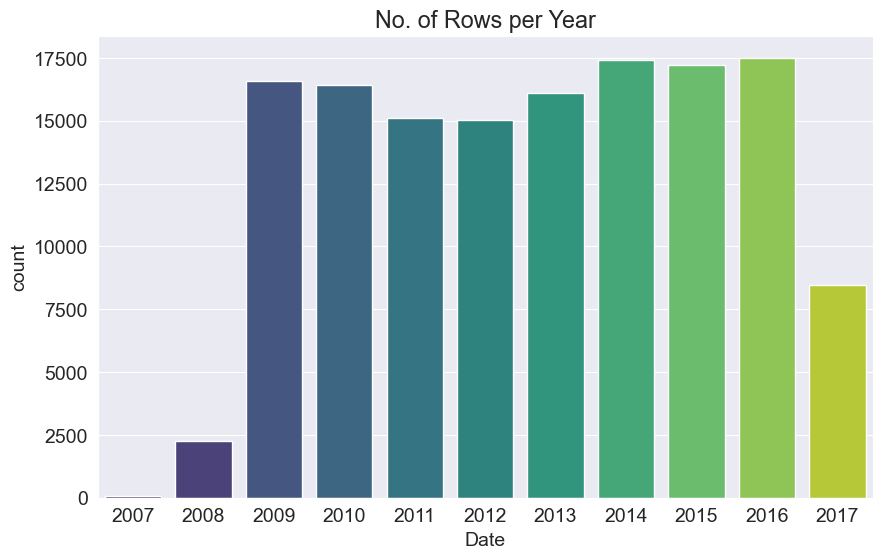

In [52]:
plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year, palette = 'viridis');

In [53]:
year = pd.to_datetime(raw_df.Date).dt.year

train_df = raw_df[year < 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]

In [54]:
print(f'{train_df.shape}')
print(f'{val_df.shape}')
print(f'{test_df.shape}')

(98988, 23)
(17231, 23)
(25974, 23)


## Input and Target Columns

In [56]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

In [57]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [58]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [59]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [60]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [61]:
print(numeric_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [62]:
print(categorical_cols)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


In [63]:
from sklearn.impute import SimpleImputer

In [64]:
imputer = SimpleImputer(strategy = 'mean').fit(raw_df[numeric_cols])

In [65]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [66]:
test_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

## Scaling Numeric Features

In [68]:
from sklearn.preprocessing import MinMaxScaler

In [69]:
scaler = MinMaxScaler().fit(raw_df[numeric_cols])

In [70]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [71]:
val_inputs.describe().loc[['min', 'max']]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,0.007075,0.030246,0.000000,0.000000,0.0,0.007752,0.000000,0.000000,0.04,0.0,0.125620,0.0816,0.000000,0.000000,0.021097,0.026871
max,0.952830,0.948960,0.666307,0.485517,1.0,1.000000,0.669231,0.850575,1.00,1.0,0.971901,0.9632,0.888889,0.888889,0.943038,0.925144


## Encoding Categorical Data

In [74]:
from sklearn.preprocessing import OneHotEncoder

In [75]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(raw_df[categorical_cols])

In [76]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

In [77]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

C:\Users\VIVEK\AppData\Local\Temp\ipykernel_33048\1584174743.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
C:\Users\VIVEK\AppData\Local\Temp\ipykernel_33048\1584174743.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
C:\Users\VIVEK\AppData\Local\Temp\ipykernel_33048\1584174743.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

In [78]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [79]:
X_test

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindGustDir_nan,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir9am_nan,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
2498,0.681604,0.801512,0.000000,0.037723,0.525852,0.372093,0.000000,0.080460,0.46,0.17,0.543802,0.5136,0.777778,0.333333,0.702532,0.808061,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2499,0.693396,0.725898,0.001078,0.037723,0.525852,0.341085,0.069231,0.195402,0.54,0.30,0.505785,0.5008,0.888889,0.888889,0.675105,0.712092,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2500,0.634434,0.527410,0.005930,0.037723,0.525852,0.325581,0.084615,0.448276,0.62,0.67,0.553719,0.6032,0.888889,0.888889,0.611814,0.477927,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2501,0.608491,0.538752,0.042049,0.037723,0.525852,0.255814,0.069231,0.195402,0.74,0.65,0.618182,0.6304,0.888889,0.888889,0.556962,0.518234,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

## Decision Tree

A **decision tree** in machine learning is a predictive model that represents decisions and their possible consequences, including chance outcomes, resource costs, and utility. It is structured as a tree where:

- **Nodes** represent a feature or attribute.
- **Branches** represent the possible values of the feature.
- **Leaves** represent the final outcome or decision (class label for classification or value for regression).

### Key Characteristics:
1. **Supervised Learning**: Used for both **classification** and **regression** tasks.
2. **Hierarchical Structure**: Makes decisions by recursively splitting data based on feature values.
3. **Explainability**: Easy to understand and interpret because of its intuitive structure.

### How It Works:
1. **Splitting**: At each node, the algorithm selects the best feature and threshold to split the data into subsets that are as homogeneous as possible.
2. **Stopping Criteria**: The tree stops growing when a predefined condition is met (e.g., maximum depth, minimum samples per leaf).
3. **Prediction**: For new data, the tree follows the decision path based on feature values until it reaches a leaf node.

### Example:
For a dataset with attributes like age, income, and spending, a decision tree might predict whether a customer is likely to buy a product by splitting data at thresholds like "Age < 30?" or "Income > $50,000?".

### Advantages:
- Easy to visualize and interpret.
- Handles both numerical and categorical data.
- Requires minimal data preprocessing (no normalization or scaling).

### Limitations:
- Prone to **overfitting**, especially with deep trees.
- Sensitive to small changes in data (can create different splits).
- Biased towards attributes with more levels.

To address limitations, techniques like **pruning**, **ensemble methods** (e.g., Random Forest, Gradient Boosting), or parameter tuning can be used.

In [81]:
from sklearn.tree import DecisionTreeClassifier # Since this is a classification problem we'll be using DecisionTreeClassifier

In [82]:
model = DecisionTreeClassifier(random_state=42) # If this was a regression problem, we would've used a DecisionTreeRegressor

In [83]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(random_state=42)

## Evaluation

In [85]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [86]:
X_train

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindGustDir_nan,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir9am_nan,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
0,0.516509,0.523629,0.001617,0.037723,0.525852,0.294574,0.153846,0.275862,0.71,0.22,0.449587,0.4800,0.888889,0.500352,0.508439,0.522073,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.375000,0.565217,0.000000,0.037723,0.525852,0.294574,0.030769,0.252874,0.44,0.25,0.497521,0.4912,0.493021,0.500352,0.514768,0.570058,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.504717,0.576560,0.000000,0.037723,0.525852,0.310078,0.146154,0.298851,0.38,0.30,0.447934,0.5056,0.493021,0.222222,0.594937,0.548944,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.417453,0.620038,0.000000,0.037723,0.525852,0.139535,0.084615,0.103448,0.45,0.16,0.613223,0.5712,0.493021,0.500352,0.533755,0.612284,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.

In [87]:
train_preds = model.predict(X_train)

In [88]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [89]:
pd.value_counts(train_preds)

C:\Users\VIVEK\AppData\Local\Temp\ipykernel_33048\1258350197.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(train_preds)


No     76707
Yes    22281
Name: count, dtype: int64

In [90]:
train_targets

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 98988, dtype: object

In [91]:
accuracy_score(train_preds, train_targets)

0.9999797955307714

Probabilities for each prediction

In [93]:
train_probs = model.predict_proba(X_train)

In [94]:
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

The decision tree is very confident about it's predictions

The trainingset accuracy is close to a 100%, for the validation set:

In [99]:
model.score(X_val, val_targets)

0.7921188555510418

In [101]:
val_targets.value_counts() / len(val_targets)

RainTomorrow
No     0.788289
Yes    0.211711
Name: count, dtype: float64

The model is only very slightly better than the 'always no' model. This is due to over-fitting

## Visualization

In [109]:
from sklearn.tree import plot_tree, export_text

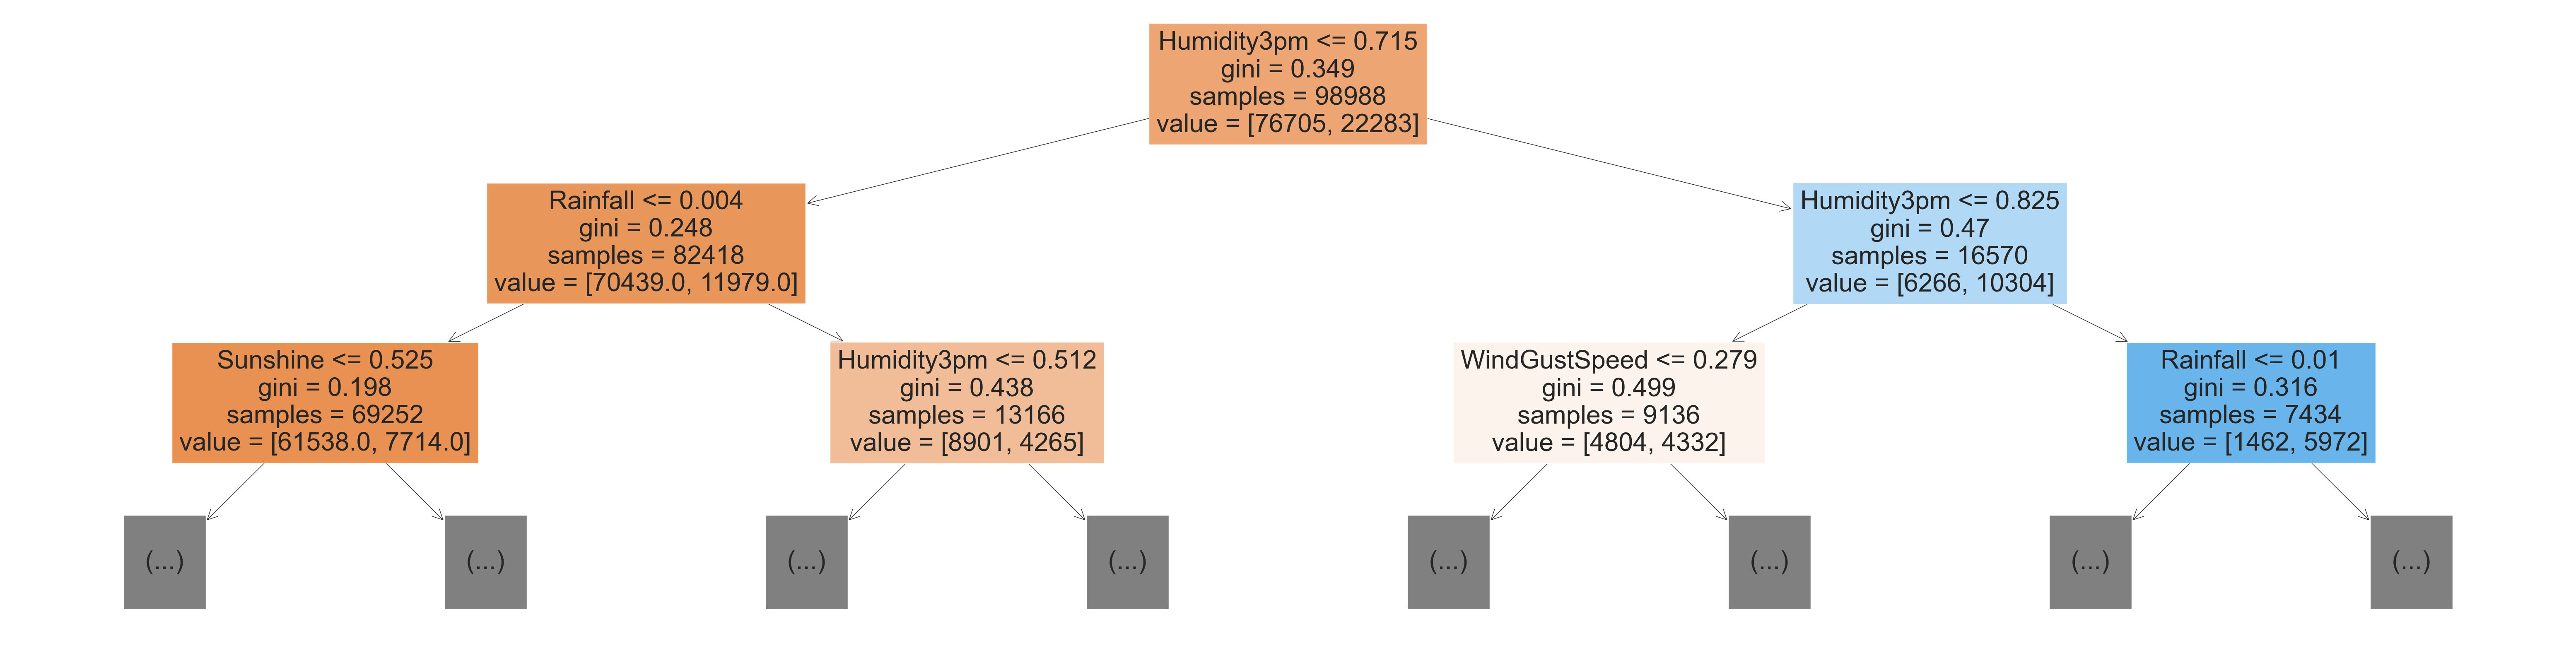

In [110]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True);

In [166]:
model.tree_.max_depth #The tree is 48 layers deep

48

In [170]:
tree_text = export_text(model, max_depth=10, feature_names=list(X_train.columns)) # Another way to display the decision tree - as text
print(tree_text[:5000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |--- Location_Watsonia <= 0.50
|   |   |   |   |   |   |   |   |--- Cloud9am <= 0.83
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm <= 0.07
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm <= 0.46
|   |   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm >  0.46
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm >  0.07
|   |   |   |   |   |   |   |   |   |   |--- MinTemp <= 0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- MinTemp >  0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated

The **Gini Score** (or Gini Impurity) is a metric used in decision trees to measure the degree of impurity or misclassification in a dataset. It helps the algorithm decide which feature to split on at each node of the tree by quantifying how well a split separates the classes.

---

### **Formula**
For a dataset with \( k \) classes, the Gini Impurity is calculated as:

\[
G = 1 - \sum_{i=1}^k (p_i)^2
\]

Where:
- \( G \): Gini Impurity
- \( p_i \): Proportion of samples belonging to class \( i \) in the node

---

### **Key Characteristics**:
1. **Range**:
   - Gini Impurity ranges from **0** to **1**.
   - A value of **0** indicates **perfect purity** (all samples in the node belong to one class).
   - Higher values indicate greater impurity (more class mixing).
2. **Interpretation**:
   - A node with mixed classes (e.g., 50% Class A, 50% Class B) will have a higher Gini Impurity than a node where most samples belong to one class.

---

### **Example**
#### Node 1:
- 70 samples belong to Class A, and 30 samples belong to Class B.
- \( p_A = 70/100 = 0.7 \), \( p_B = 30/100 = 0.3 \).

\[
G = 1 - (0.7^2 + 0.3^2) = 1 - (0.49 + 0.09) = 1 - 0.58 = 0.42
\]

#### Node 2:
- 100 samples all belong to Class A.
- \( p_A = 1 \), \( p_B = 0 \).

\[
G = 1 - (1^2 + 0^2) = 1 - 1 = 0
\]

Node 2 is purer than Node 1.

---

### **Why Use Gini Impurity?**
In decision trees:
- At each split, the algorithm aims to minimize Gini Impurity in the resulting child nodes.
- The feature and split point with the lowest weighted average Gini Impurity are chosen.

---

### **Comparison with Other Metrics**:
- **Entropy** (used in ID3 and sometimes CART) is another impurity measure but involves logarithms, making it computationally more expensive.
- **Gini Impurity** is faster to compute and is the default criterion in **CART** (Classification and Regression Trees).

---

### Weighted Gini Impurity for Splits
When splitting, the Gini Impurity is calculated as a weighted average of the Gini scores of child nodes:

\[
G_{split} = \frac{n_{left}}{n_{total}} G_{left} + \frac{n_{right}}{n_{total}} G_{right}
\]

Where:
- \( G_{split} \): Gini Impurity after the split
- \( G_{left} \), \( G_{right} \): Gini Impurities of the left and right child nodes
- \( n_{left}, n_{right}, n_{total} \): Number of samples in the left, right, and total dataset

This ensures the split is evaluated based on both impurity and size.

## Feature Importance

Based on the gini index computations, a decision tree assigns an "importance" value to each feature. Thes evalues can be used to interpret the results given by a decision tree.

In [188]:
X_train.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W',
       'WindDir3pm_WNW', 'WindDir3pm_WSW', 'WindDir3pm_nan', 'RainToday_No',
       'RainToday_Yes', 'RainToday_nan'],
      dtype='object', length=119)

In [190]:
model.feature_importances_ #These are the importances per column

array([3.48942086e-02, 3.23605486e-02, 5.91385668e-02, 2.49619907e-02,
       4.94652143e-02, 5.63334673e-02, 2.80205998e-02, 2.98128801e-02,
       4.02182908e-02, 2.61441297e-01, 3.44145027e-02, 6.20573699e-02,
       1.36406176e-02, 1.69229866e-02, 3.50001550e-02, 3.04064076e-02,
       2.24086587e-03, 2.08018104e-03, 1.27475954e-03, 7.26936324e-04,
       1.39779517e-03, 1.15264873e-03, 6.92808159e-04, 1.80675598e-03,
       1.08370901e-03, 1.19773895e-03, 8.87119103e-04, 2.15764220e-03,
       1.67094731e-03, 7.98919493e-05, 1.10558668e-03, 1.42008656e-03,
       4.10087635e-04, 1.09028115e-03, 1.44164766e-03, 9.08284767e-04,
       1.05770304e-03, 6.18133455e-04, 1.80387272e-03, 2.10403527e-03,
       2.74413333e-04, 7.31599405e-04, 1.35408990e-03, 1.54759332e-03,
       1.30917564e-03, 1.07134670e-03, 8.36408023e-04, 1.62662229e-03,
       1.00326116e-03, 2.16053455e-03, 8.46802258e-04, 1.88919081e-03,
       9.29325203e-04, 1.29545157e-03, 1.27604831e-03, 5.12736888e-04,
      

In [196]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False) 

In [200]:
importance_df.head(10) #These are the 10 most important columns

,feature,importance
9,Humidity3pm,0.261441
11,Pressure3pm,0.062057
2,Rainfall,0.059139
5,WindGustSpeed,0.056333
4,Sunshine,0.049465
8,Humidity9am,0.040218
14,Temp9am,0.035000
0,MinTemp,0.034894
10,Pressure9am,0.034415
1,MaxTemp,0.032361


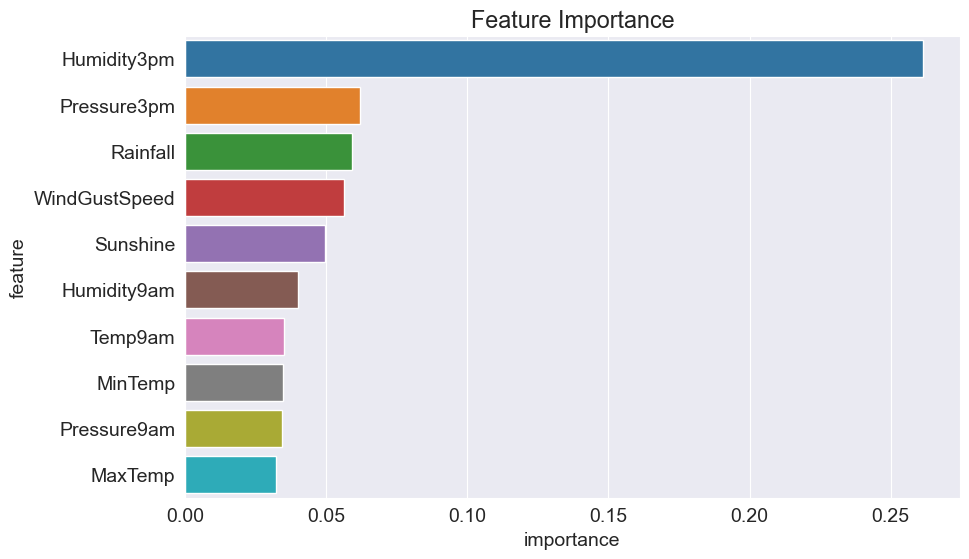

In [206]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature', hue='feature');

## Hyperparameter Tuning and Overfitting

Since the decision tree gave a 100% accuracy score on the training dataset, but was only slightly better than the dumb model on the validation dataset. We will have to reduce overfitting. The process of reducing overfitting is called Regularization.
The `DecisionTreeClassifier` accepts several arguments, some of which can be modified to reduce overfitting.

In [216]:
?DecisionTreeClassifier

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None

These arguments are called hyperparameters because they must be configured manually (as opposed to the parameters within the model which are learned from the data. We'll explore a couple of hyperparameters:

- `max_depth`
- `max_leaf_nodes`

In [221]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)

In [225]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [226]:
model.score(X_train, train_targets)

0.8291308037337859

In [229]:
model.score(X_val, val_targets)

0.8334397307178921

Although, the training accuracy has gone down, the validation accuracy has increased which is what we want.

The training accuracy has gone down because the model is not going through all of the training data, it's only going three levels deep.

In [232]:
model.classes_

array(['No', 'Yes'], dtype=object)

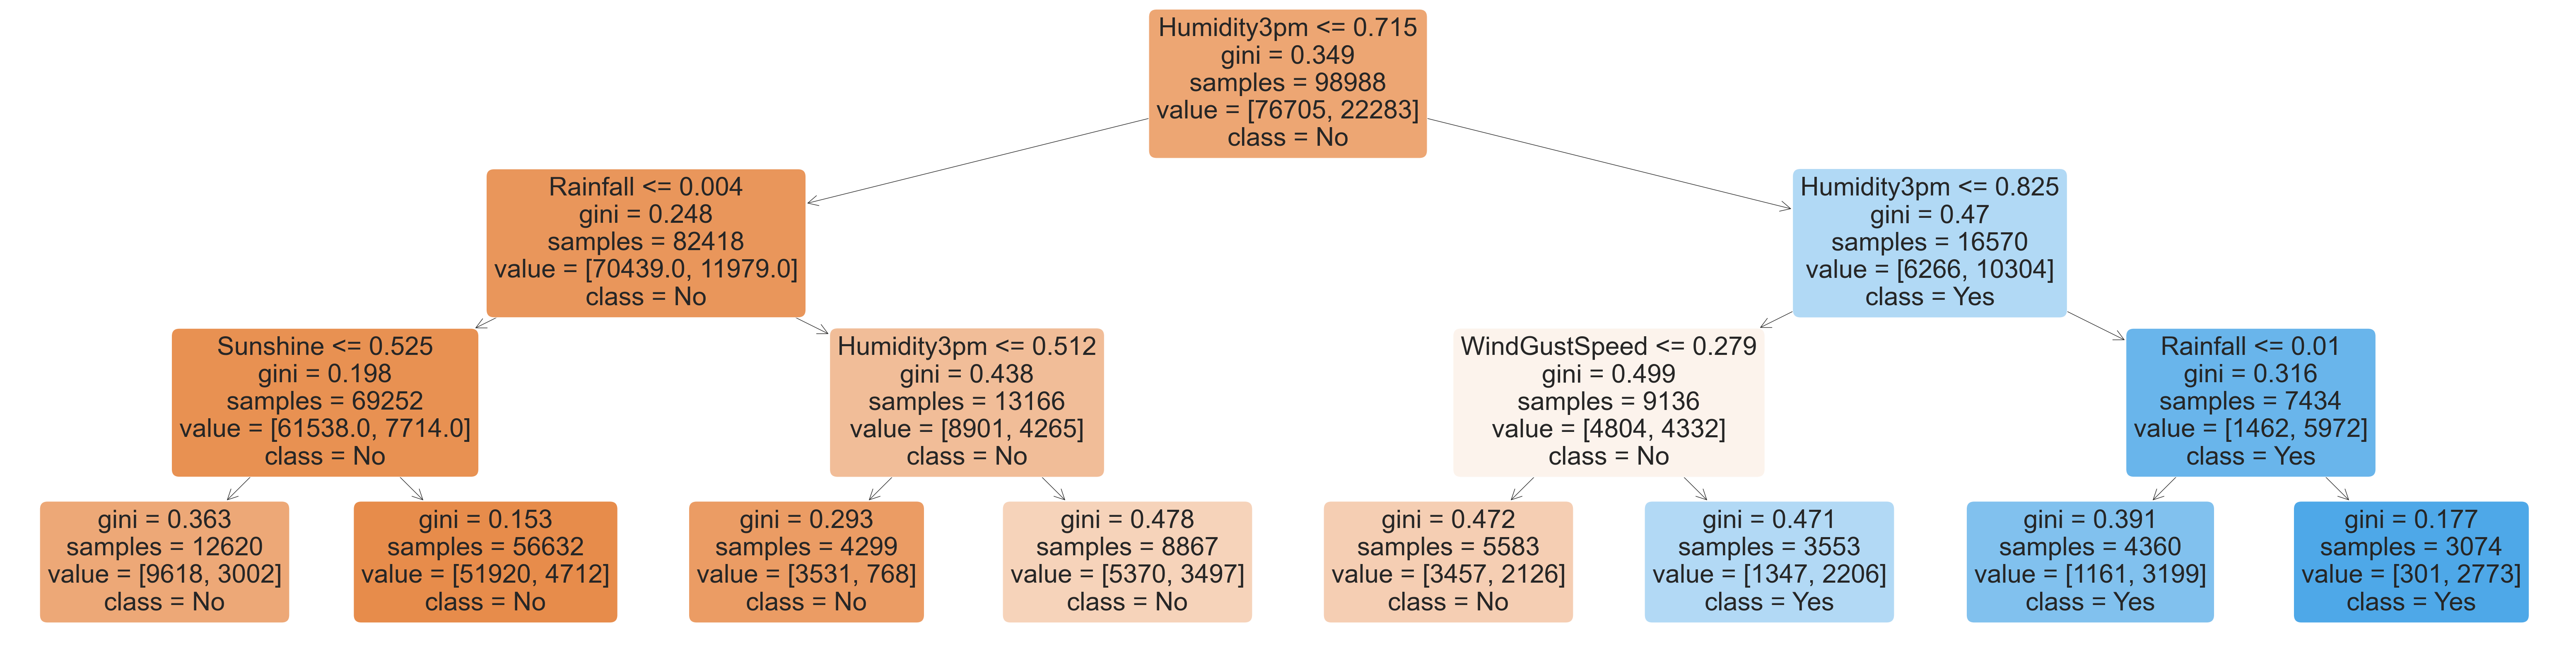

In [234]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, rounded=True, filled=True, class_names=model.classes_);

In [236]:
print(export_text(model, feature_names=list(X_train.columns)))

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- class: No
|   |   |--- Sunshine >  0.52
|   |   |   |--- class: No
|   |--- Rainfall >  0.00
|   |   |--- Humidity3pm <= 0.51
|   |   |   |--- class: No
|   |   |--- Humidity3pm >  0.51
|   |   |   |--- class: No
|--- Humidity3pm >  0.72
|   |--- Humidity3pm <= 0.82
|   |   |--- WindGustSpeed <= 0.28
|   |   |   |--- class: No
|   |   |--- WindGustSpeed >  0.28
|   |   |   |--- class: Yes
|   |--- Humidity3pm >  0.82
|   |   |--- Rainfall <= 0.01
|   |   |   |--- class: Yes
|   |   |--- Rainfall >  0.01
|   |   |   |--- class: Yes



Let's create a helper function to experiment with different depths

In [249]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, train_targets)
    model.score(X_train, train_targets)
    train_error = 1 - model.score(X_train, train_targets)    # Error is the % it got wrong
    val_error = 1 - model.score(X_val, val_targets)
    return {'Max Depth': md, 'Training Error': train_error, 'Validation Error': val_error}

In [252]:
%%time

errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

CPU times: total: 36.2 s
Wall time: 1min 7s


In [251]:
errors_df

,Max Depth,Training Error,Validation Error
0,1,0.184315,0.177935
1,2,0.179547,0.172712
2,3,0.170869,0.166560
3,4,0.165707,0.164355
4,5,0.160676,0.159074
5,6,0.156271,0.157275
6,7,0.153312,0.154605
7,8,0.147806,0.158029
8,9,0.140906,0.156578
9,10,0.132945,0.157333


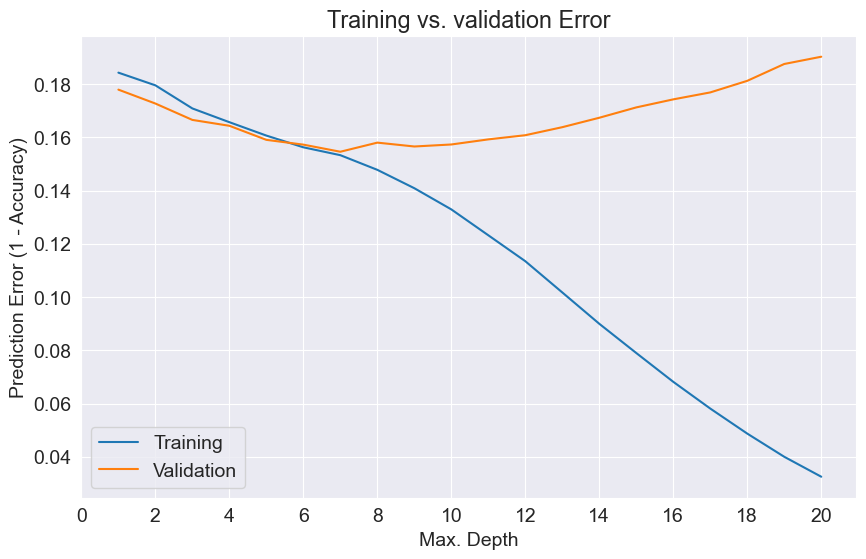

In [256]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

In the above case, it appears that a maximum depth of 7 results in the lowest validation error.

In [263]:
model = DecisionTreeClassifier(max_depth=7, random_state=42).fit(X_train, train_targets)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.8466884874934335, 0.8453949277465034)

Another way to control the size of complexity of a decision tree is to limit the number of leaf nodes. This allows branches of the tree to have varying depths.

In [267]:
model = DecisionTreeClassifier(max_leaf_nodes=128, random_state=42).fit(X_train, train_targets)

In [269]:
model.score(X_train, train_targets)

0.8480421869317493

In [271]:
model.score(X_val, val_targets)

0.8442342290058615

In [273]:
model.tree_.max_depth

12

In [275]:
model_text = export_text(model, feature_names=list(X_train.columns))
print(model_text[:3000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- Humidity3pm >  0.28
|   |   |   |   |   |   |--- Sunshine <= 0.05
|   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |--- Sunshine >  0.05
|   |   |   |   |   |   |   |--- Pressure3pm <= 0.43
|   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |--- Pressure3pm >  0.43
|   |   |   |   |   |   |   |   |--- Humidity3pm <= 0.57
|   |   |   |   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- WindDir9am_NNE <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |   |--- WindDir9am_NNE >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindD

## RANDOM FOREST

**Random Forest** is a supervised machine learning algorithm commonly used for classification and regression tasks. It is an **ensemble learning method** that builds multiple decision trees and combines their outputs to improve performance, reduce overfitting, and increase robustness.

### Key Concepts:
1. **Ensemble of Decision Trees**:
   - Random Forest creates a collection (or "forest") of decision trees during training.
   - Each tree is trained on a different random subset of the data (using **bootstrapping**) and a random subset of features (to introduce diversity).

2. **Voting/Averaging**:
   - For classification tasks, the final prediction is based on the majority vote from all trees.
   - For regression tasks, the final output is the average prediction of all trees.

3. **Randomness**:
   - Randomly selects data samples and features to build each tree, making the model less prone to overfitting compared to a single decision tree.

### Advantages:
- Handles large datasets and high-dimensional data well.
- Reduces the risk of overfitting due to randomness and averaging.
- Works well with both categorical and numerical data.

### Disadvantages:
- Can be computationally expensive for large datasets.
- Less interpretable compared to individual decision trees.

### Example Use Cases:
- Spam detection
- Fraud detection
- Predicting housing prices
- Medical diagnosis

### Python Example:
```python
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Feature Importances
print("Feature Importances:", model.feature_importances_)
```

In this example, `n_estimators` controls the number of trees in the forest, and `feature_importances_` shows the importance of each feature in prediction.

We'll use `RandomForestClassifier` from `sklearn.ensemble`

In [286]:
from sklearn.ensemble import RandomForestClassifier # Ensemble is the collection of multiple models here

In [288]:
model = RandomForestClassifier(n_jobs=-1, random_state=42)

`n_jobs` allows the random forest to use multiple parallel workers to train decision trees. Basically take less time

In [302]:
%%time
model.fit(X_train, train_targets)

CPU times: total: 35.8 s
Wall time: 3.63 s


RandomForestClassifier(n_jobs=-1, random_state=42)

In [303]:
model.score(X_train, train_targets)

0.9999494888269285

In [304]:
model.score(X_val, val_targets)

0.8566537055307295

Once again, the training data accuracy is almost 100%, but this time the validation accuracy is much better. In fact, it is better than the best single decision tree we had trained so far.

This general technique of combining the results of many models is called "ensembeling". It works out because most errors of individual models cancel out on averaging.

The probability of a class is simply the fraction of trees which predicted the given class

In [316]:
X_train

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindGustDir_nan,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir9am_nan,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
0,0.516509,0.523629,0.001617,0.037723,0.525852,0.294574,0.153846,0.275862,0.71,0.22,0.449587,0.4800,0.888889,0.500352,0.508439,0.522073,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.375000,0.565217,0.000000,0.037723,0.525852,0.294574,0.030769,0.252874,0.44,0.25,0.497521,0.4912,0.493021,0.500352,0.514768,0.570058,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.504717,0.576560,0.000000,0.037723,0.525852,0.310078,0.146154,0.298851,0.38,0.30,0.447934,0.5056,0.493021,0.222222,0.594937,0.548944,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.417453,0.620038,0.000000,0.037723,0.525852,0.139535,0.084615,0.103448,0.45,0.16,0.613223,0.5712,0.493021,0.500352,0.533755,0.612284,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.

In [318]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [311]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.93, 0.07],
       [1.  , 0.  ],
       [0.99, 0.01],
       ...,
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.96, 0.04]])

We can access individual trees using `model.estimators_`

In [320]:
len(model.estimators_)

100

In [322]:
model.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)

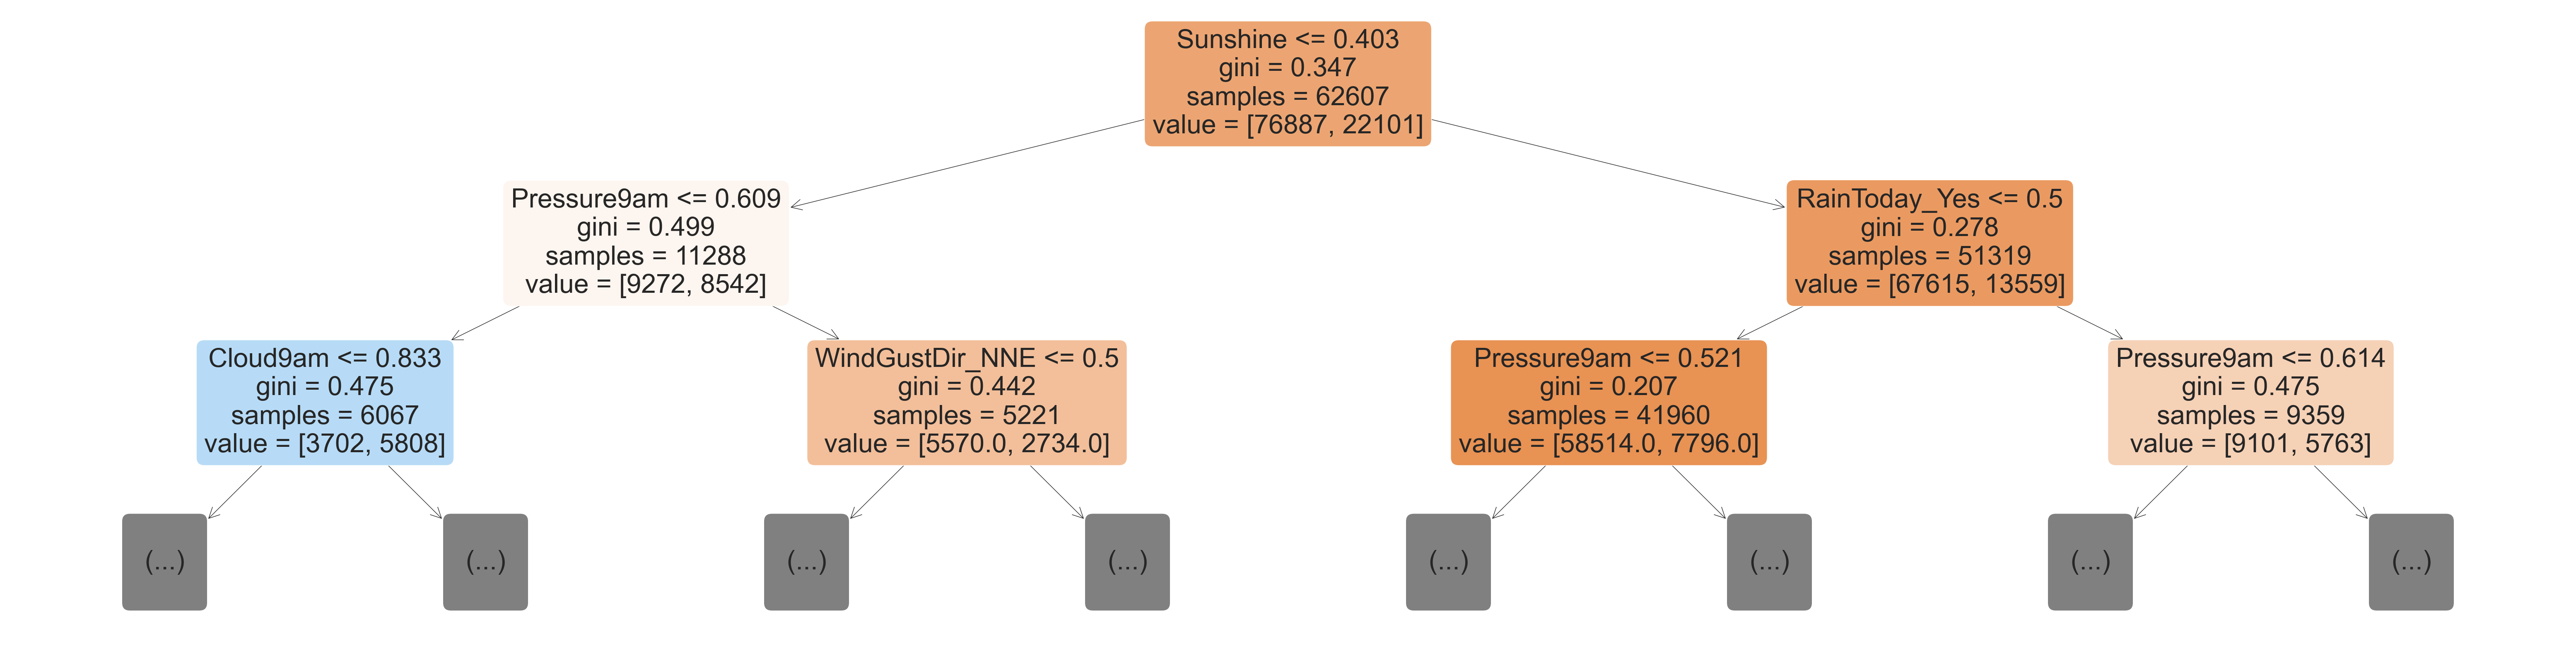

In [328]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[0], max_depth=2, feature_names=X_train.columns, filled=True, rounded=True); #Decision Tree #0 

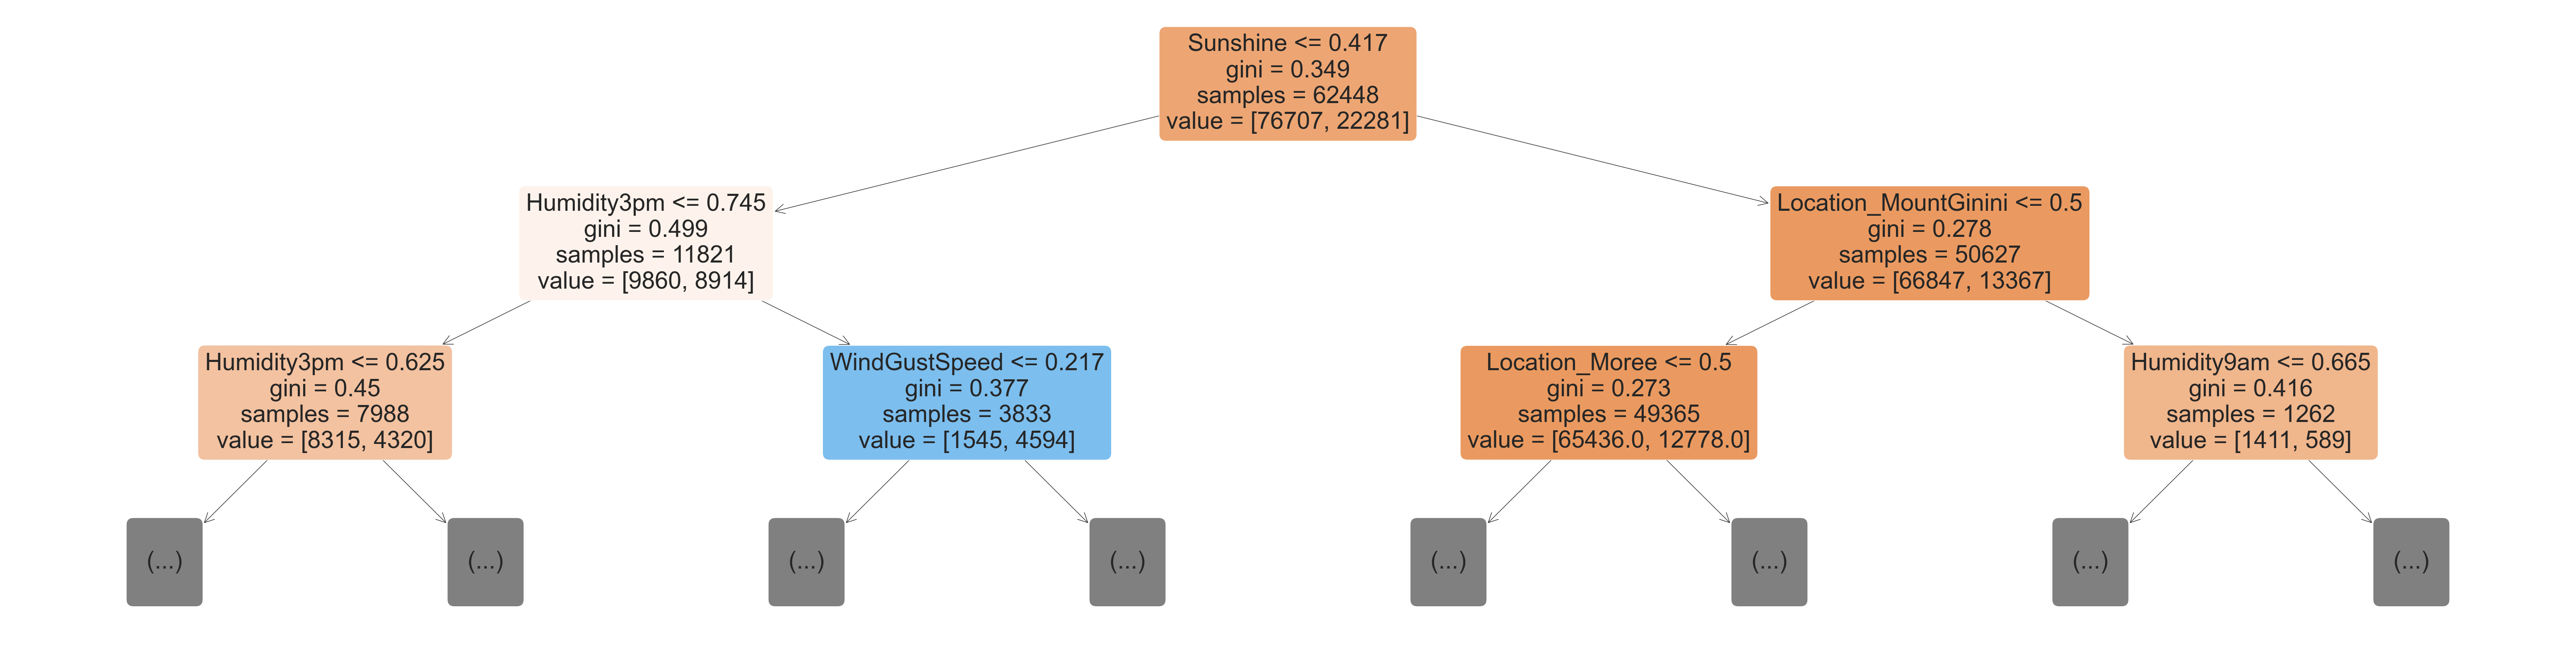

In [332]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[15], max_depth=2, feature_names=X_train.columns, filled=True, rounded=True);  #Decision Tree #20 

The random forest also assigns an 'importance' to each feature

In [348]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [350]:
importance_df.head(10)

,feature,importance
9,Humidity3pm,0.139904
4,Sunshine,0.053696
11,Pressure3pm,0.052713
8,Humidity9am,0.050051
2,Rainfall,0.048077
10,Pressure9am,0.047944
5,WindGustSpeed,0.047477
15,Temp3pm,0.044379
1,MaxTemp,0.041865
0,MinTemp,0.041199


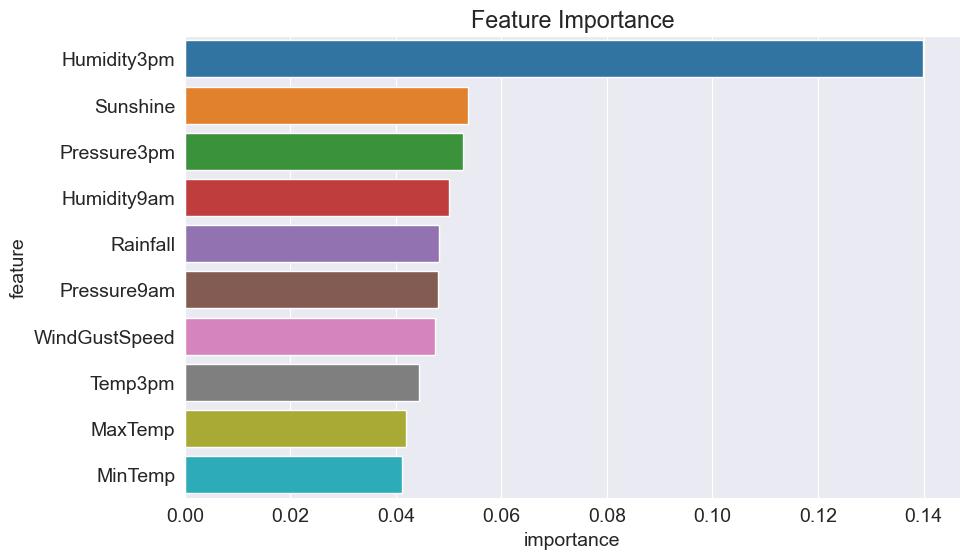

In [352]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature', hue='feature');

The skewness is a lot lesser than a single decision tree

## Hyperparameter Tuning with Random Forests

In [356]:
?RandomForestClassifier

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
    monotonic_cst=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
Trees in the forest use the best split strategy, i.e. equivalent to passing
`splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the 

In [359]:
base_model = RandomForestClassifier(n_jobs=-1, random_state=42).fit(X_train, train_targets)

In [361]:
base_train_acc = base_model.score(X_train, train_targets)
base_val_acc = base_model.score(X_val, val_targets)

In [363]:
base_accs = base_train_acc, base_val_acc
base_accs

(0.9999494888269285, 0.8566537055307295)

We can use this aa a benchmark for hyperparameters tuning

`n_estimators`
is the number of decision trees in a Random Forest. Its default value in `sklearn` is **100**. As a general rule, try to have as few estimators as needed

In [368]:
model = RandomForestClassifier(n_jobs=-1, random_state=42, n_estimators=10).fit(X_train, train_targets)

In [370]:
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.986958015112943, 0.8485868492832686)

In [372]:
model = RandomForestClassifier(n_jobs=-1, random_state=42, n_estimators=500).fit(X_train, train_targets)

In [373]:
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9999797955307714, 0.8577563693343393)

`max_depth` and `max_leaf_nodes`
The arguments are passed ddirectly to each decision tree. By default, no max depth is specified. We can specify a `max_depth` to reduce overfitting

In [378]:
def test_params(**params): # **params allows us to pass multiple parameters (kwargs)
    model = RandomForestClassifier(n_jobs=-1, random_state=42, **params).fit(X_train, train_targets)
    return model.score(X_train, train_targets), model.score(X_val, val_targets)

In [380]:
test_params(max_depth=5) 

(0.8197862367155615, 0.8240961058557251)

In [382]:
test_params(max_depth=26)

(0.9814826039519942, 0.8572340549010504)

In [ ]:
test_params(max_leaf_nodes=2**5) # 2**5 means 2^5

**`max_features`** controls how many features each decision tree in a Random Forest can consider when splitting a node. It ensures diversity among trees by limiting the feature options they use.  

- For **classification**, the default is the square root of the total number of features (`sqrt`).
- For **regression**, the default is the total number of features (`n_features`).  

By using only a subset of features, trees become less correlated, which improves overall model perform

Here are all possible values for **`max_features`** in Random Forest:

- **`auto` or `sqrt`** (default for classification):  
  - Uses the square root of the total number of features.  
  - Promotes diversity by limiting the number of features considered at each split.

- **`log2`**:  
  - Uses the base-2 logarithm of the total number of features.  
  - Results in even fewer features being considered, increasing diversity but potentially reducing accuracy.

- **An integer (e.g., `5`)**:  
  - Specifies the exact number of features to consider at each split.

- **A float (e.g., `0.3`)**:  
  - Specifies a fraction of the total number of features (e.g., `0.3` means 30% of features).

- **`None`** (default for regression):  
  - Uses all features available in the dataset at each split.  
  - Increases the risk of trees becoming similar but can work well for simpler datasets.ance.

In [392]:
test_params(max_features='log2')

(0.9999595910615429, 0.8558992513493123)

In [394]:
test_params(max_features=3)

(0.9999494888269285, 0.8543323080494458)

In [395]:
test_params(max_features=6)

(0.9999595910615429, 0.8558992513493123)

In [402]:
test_params(max_features=20)

(0.9999595910615429, 0.8565956705936975)

In [397]:
test_params(max_features=0.3)

(0.9999494888269285, 0.8571760199640184)

In [400]:
base_accs

(0.9999494888269285, 0.8566537055307295)

`min_samples_split` and `min_samples_leaf`
-

### **`min_samples_split`**
- **Definition**: The minimum number of samples required to split an internal node.
- **Default**: `2`
- **Key Points**:
  - If the number of samples at a node is less than this value, the node won’t be split further.
  - Larger values make the tree less complex by reducing splits, which can help prevent overfitting.

**Possible Values**:
- **Integer (e.g., `10`)**: Specifies the exact number of samples required for a split.
- **Float (e.g., `0.1`)**: Specifies a fraction of the total number of samples (e.g., `0.1` means 10% of the dataset).

---

### **`min_samples_leaf`**
- **Definition**: The minimum number of samples required to be in a leaf node.
- **Default**: `1`
- **Key Points**:
  - Ensures that leaf nodes have at least this number of samples.
  - Higher values can smooth the model predictions and prevent overly small leaves, reducing overfitting.

**Possible Values**:
- **Integer (e.g., `5`)**: Specifies the exact minimum number of samples in a leaf.
- **Float (e.g., `0.05`)**: Specifies a fraction of the total number of samples (e.g., `0.05` means 5% of the dataset).

---

**Summary**:
- **`min_samples_split`** controls when to split a node.  
- **`min_samples_leaf`** controls the minimum size of leaf nodes.  
Both parameters balance the tree’s complexity and performance, influencing overfitting and underfitting.

In [413]:
test_params(min_samples_split=5, min_samples_leaf=2)

(0.9573584676930537, 0.855144797167895)

In [411]:
test_params(min_samples_split=100, min_samples_leaf=60)

(0.8495676243585081, 0.8451047530613429)

### **`min_impurity_decrease`**

- **Definition**: The minimum decrease in impurity required for a node to split.
  - Impurity measures how mixed the classes are within a node (e.g., Gini Impurity or Entropy).
  - A split occurs only if it reduces impurity by at least this threshold.
  
- **Default**: `0.0`
  - Any positive decrease in impurity can trigger a split by default.

---

### **Key Points**:
- Helps control tree growth by requiring a significant reduction in impurity for splitting.
- Higher values make the tree less complex by avoiding small, insignificant splits.
- Useful for regularization to prevent overfitting.

---

### **Possible Values**:
- **Float (e.g., `0.001`)**: Specifies the exact threshold for impurity reduction.
  - Example: A value of `0.001` means the split must decrease impurity by at least `0.001` to happen.
  
---

### **Summary**:
- **`min_impurity_decrease`** acts as a threshold to decide when a split is worth making.  
- Setting this value appropriately helps simplify the model and reduce overfitting.

In [418]:
test_params(min_impurity_decrease=1e-7) # 1e-7 = 1×10^(−7) or 0.0000001.

(0.9996060128500425, 0.8561313910974406)

In [420]:
test_params(min_impurity_decrease=1e-2)

(0.774891906089627, 0.7882885497069235)

In [424]:
test_params(min_impurity_decrease=1e-6)

(0.9888168262819735, 0.8561313910974406)

In [425]:
base_accs

(0.9999494888269285, 0.8566537055307295)

### **`bootstrap`**

- **Definition**: Determines whether sampling with replacement is used when building each tree in the Random Forest.
  - If `True`, each tree is trained on a random subset of the data with replacement (some samples may be used multiple times, while others might be left out).
  - If `False`, the entire dataset is used for each tree without sampling.

- **Default**: `True`  
  - Bootstrapping is enabled by default, aligning with the "random" aspect of Random Forest.

---

### **Key Points**:
- **With Replacement (`True`)**: Encourages diversity among trees by training them on slightly different datasets.
- **Without Replacement (`False`)**: All trees are trained on the same dataset, reducing randomness but possibly improving performance if the dataset is small.

---

### **`max_samples`**

- **Definition**: Specifies the number (or fraction) of samples to draw for training each tree when `bootstrap=True`.
  - If `None`, the size of the bootstrap sample equals the size of the dataset.
  - If set to a fraction (e.g., `0.8`), it means 80% of the data will be sampled for each tree.

- **Default**: `None`
  - All samples are used for bootstrapping by default.

---

### **Key Points**:
- Helps control how much data is used per tree when bootstrapping.
- A lower value (e.g., `0.5`) increases randomness but might slightly reduce model performance.
- A higher value (close to `1.0`) reduces randomness but may lead to less diversity among trees.

---

### **Possible Values for `bootstrap`**:
- `True`: Sampling with replacement (default).
- `False`: No sampling; the entire dataset is used for each tree.

### **Possible Values for `max_samples`**:
- **Integer (e.g., `100`)**: Exact number of samples for each tree.
- **Float (e.g., `0.8`)**: Fraction of samples (e.g., 80% of the dataset).
- **`None`**: Use all samples (default).

---

### **Summary**:
- `bootstrap` controls whether sampling with replacement is used, and `max_samples` defines how much data is sampled for each tree when bootstrapping. Together, they influence tree diversity and model robustness.

In [429]:
test_params(bootstrap=False)

(0.9999797955307714, 0.8567697754047937)

In [431]:
test_params(max_samples=0.9)

(0.9997676486038711, 0.8565376356566653)

### **`class_weight`**

- **Definition**: Adjusts the weights of classes to handle imbalanced datasets in classification problems. This parameter helps the Random Forest focus more on the underrepresented classes.

---

### **Default**:  
`None`  
- All classes are treated equally regardless of their distribution.

---

### **Possible Values**:
1. **`None`**: No weights are applied; classes are treated equally.
2. **`balanced`**:
   - Weights are automatically calculated as:
     \[
     \text{Weight of class } i = \frac{\text{Total samples}}{\text{Number of classes} \times \text{Samples in class } i}
     \]
   - This helps balance class distributions in the dataset.
3. **`balanced_subsample`**:
   - Similar to `balanced`, but weights are computed for each individual bootstrap sample (if `bootstrap=True`).
4. **Custom Dictionary**:
   - You can manually specify weights for each class, e.g., `{0: 1, 1: 10}`, where class `1` is given 10x the weight of class `0`.

---

### **Key Points**:
- Use `balanced` or `balanced_subsample` when you have an imbalanced dataset (e.g., one class significantly outnumbers another).
- Custom weights allow fine-tuning for domain-specific importance of classes.

---

### **Impact**:
- Ensures the model doesn’t bias predictions toward the majority class.
- Increases the focus on minority classes, improving performance metrics like recall or F1-score for those classes.

---

### **Summary**:
`class_weight` provides flexibility to handle class imbalance effectively, with options to automate or manually define class importance. Default behavior treats all classes equally, but `balanced` or custom weights can be used for better performance on imbalanced datasets.

In [452]:
train_targets.value_counts() / len(train_targets)

RainTomorrow
No     0.774892
Yes    0.225108
Name: count, dtype: float64

In [454]:
model.classes_

array(['No', 'Yes'], dtype=object)

In [456]:
test_params(class_weight='balanced')

(0.9999595910615429, 0.8553769369160235)

In [458]:
test_params(class_weight={'No': 1, 'Yes': 2})

(0.9999595910615429, 0.8558412164122802)

In [460]:
base_accs

(0.9999494888269285, 0.8566537055307295)

## Putting It Together

In [472]:
model = RandomForestClassifier(n_jobs=-1,
        random_state=42,
        n_estimators=500,
        max_features=20,
        max_depth=30,
        class_weight={'No': 1, 'Yes': 1.5})

In [474]:
model.fit(X_train, train_targets)

RandomForestClassifier(class_weight={'No': 1, 'Yes': 1.5}, max_depth=30,
                       max_features=20, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [475]:
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9991716167616277, 0.8565956705936975)

In [476]:
base_accs

(0.9999494888269285, 0.8566537055307295)

In [480]:
model.score(X_test, test_targets)

0.845922845922846

In [486]:
def predict_input(model, single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob

new_input = {'Date': '2021-06-19',
             'Location': 'Launceston',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [488]:
predict_input(model, new_input)

C:\Users\VIVEK\AppData\Local\Temp\ipykernel_33048\154259699.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
C:\Users\VIVEK\AppData\Local\Temp\ipykernel_33048\154259699.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
C:\Users\VIVEK\AppData\Local\Temp\ipykernel_33048\154259699.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inse

('Yes', 0.7978790284606527)